In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('VIXCLS.csv')

In [5]:
df.head()

,observation_date,VIXCLS
0,1990-01-02,17.24
1,1990-01-03,18.19
2,1990-01-04,19.22
3,1990-01-05,20.11
4,1990-01-08,20.26


In [7]:
df.shape

(9310, 2)

In [9]:
df.isnull().sum()

observation_date      0
VIXCLS              299
dtype: int64

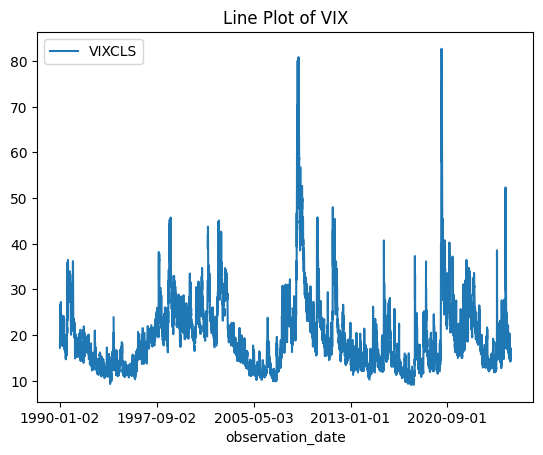

In [5]:
df.plot(x='observation_date', y='VIXCLS', title='Line Plot of VIX')
plt.show()

In [12]:
df.dtypes

observation_date     object
VIXCLS              float64
dtype: object

In [ ]:
min(df['VIXCLS'])
max(df['VIXCLS'])


9.14

In [4]:
df["date"] = pd.to_datetime(df["observation_date"])
df

,observation_date,VIXCLS,date
0,1990-01-02,17.24,1990-01-02
1,1990-01-03,18.19,1990-01-03
2,1990-01-04,19.22,1990-01-04
3,1990-01-05,20.11,1990-01-05
4,1990-01-08,20.26,1990-01-08
...,...,...,...
9305,2025-09-02,17.17,2025-09-02
9306,2025-09-03,16.35,2025-09-03
9307,2025-09-04,15.30,2025-09-04
9308,2025-09-05,15.18,2025-09-05


C:\Users\deepi\AppData\Local\Temp\ipykernel_33428\3108386741.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_avg_vix = df["VIXCLS"].resample("Q").mean()


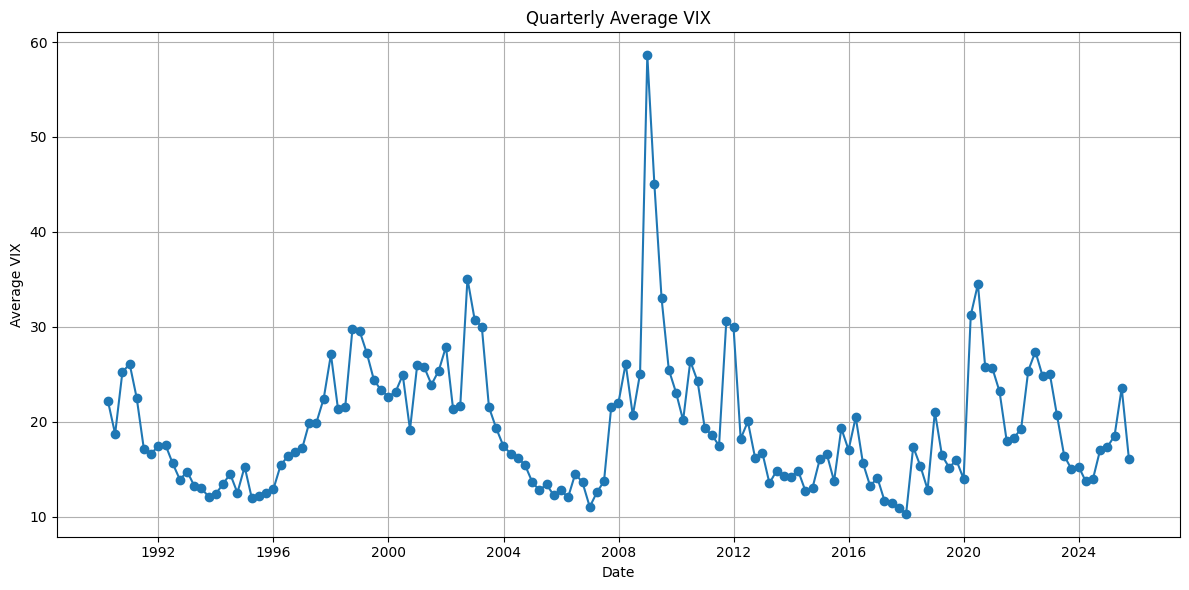

In [ ]:
df.set_index("date", inplace=True)

quarterly_avg_vix = df["VIXCLS"].resample("Q").mean()
quarterly_avg_vix.index = quarterly_avg_vix.index.to_period("Q")

all_quarters_df = quarterly_avg_vix.reset_index()
all_quarters_df.columns = ['quarter', 'average_vix']

plt.figure(figsize=(12, 6))
plt.plot(quarterly_avg_vix.index, quarterly_avg_vix.values, marker='o')
plt.title("Quarterly Average VIX")
plt.xlabel("Date")
plt.ylabel("Average VIX")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
top_10_quarters = quarterly_avg_vix.sort_values(ascending=False).head(10)
print(top_10_quarters)

date
2008-12-31    58.604687
2009-03-31    45.000000
2002-09-30    35.068438
2020-06-30    34.493651
2009-06-30    33.015714
2020-03-31    31.224516
2002-12-31    30.726719
2011-09-30    30.583594
2003-03-31    30.022623
2011-12-31    29.939524
Name: VIXCLS, dtype: float64
